In [1]:
# Data cleaning, processing and refining

import pandas as pd

data = "dataset.csv"
df = pd.read_csv(data)
df.drop('Timestamp', axis=1, inplace=True) 

df.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)
df['Age'] = df['Age'].astype('int64')
df.drop(df.loc[(df['Sex'] != 'Male') & (df['Sex'] != 'Female')].index, inplace=True)
titles = list(df.columns)
titles[10], titles[11] = titles[11], titles[10]
titles[11], titles[13] = titles[13], titles[11]
titles[12], titles[13] = titles[13], titles[12]
df = df[titles]
df.loc[df['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
df.loc[df['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
df.loc[df['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
df.loc[df['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
df.loc[df['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
df.loc[df['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5
df['Time Spent'] = df['Time Spent'].astype('int64')
df.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,3,5,5,2,2,2,3,2,5,4,5
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,3,4,4,2,5,5,1,1,5,4,5
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,2,2,4,1,5,3,3,1,4,2,5
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",5,4,2,3,3,1,5,5,1,2,4,3,2
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,3,5,4,5,4,5,3,3,3,4,4,1


In [2]:
# Updating grading system

questions = titles[8:]
for q in questions:
    df.loc[df[q] == 3, q] = 0
    df.loc[df[q] == 4, q] = 3
    df.loc[df[q] == 1, q] = -1
    df.loc[df[q] == 2, q] = 0

df.loc[df['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
df.loc[df['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 3
df.loc[df['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = -2
df.loc[df['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = -4

df.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,0,5,5,0,0,0,0,0,5,3,5
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,3,0,3,3,0,5,5,-1,-1,5,3,5
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,0,0,0,3,-1,5,0,0,-1,3,0,5
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",5,3,0,0,0,-1,5,5,-1,0,3,0,0
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,0,5,3,5,3,5,0,0,0,3,3,-1


In [3]:
# Merging ADHD, Anxiety, Self Esteem and Depression Scores, Total

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
df['ADHD Score'] = df[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
df['Anxiety Score'] = df[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
df['Self Esteem Score'] = df[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
df['Depression Score'] = df[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
df['Total Score'] = df[Total].sum(axis=1)

df.drop(df.iloc[:, 8:20], inplace = True, axis = 1)

df.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,15,0,0,13,28
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,9,5,3,13,30
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,4,-1,8,14
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",5,3,4,4,3,14
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,13,8,0,5,26


In [4]:
# Using ROC curve to find a cutoff so that the false positive alerts is in check

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve

scores = np.array(df['Total Score']).reshape(-1, 1) 

kmeans = KMeans(n_clusters=2, n_init=16, random_state=16).fit(scores)
labels = kmeans.labels_  

if np.mean(scores[labels == 0]) > np.mean(scores[labels == 1]):
    labels = 1 - labels

fpr, tpr, thresholds = roc_curve(labels, scores)
j_scores = tpr - fpr  # Compute Youden’s J Index
best_index = np.argmax(j_scores)
cut_off = thresholds[best_index]
print(cut_off)

18.0


In [5]:
# An outcome column, 0: No problem, 1: Mental problem potential alert
# We got few results: Uisng ROC curve cutoff - 18, we got 44% as mentally ill. 
# A correct percentage of mentally ill from the given data is about ~37%. 
# Ergo, after few more hit trials, we would be using 22.5 as cutoff, it makes ~37% of poeple in our dataset as mentally ill.

def score(s):
  if s < 22.5:
    return "0"
  elif s >= 22.5:
    return "1"

df['Outcome']= df['Total Score'].apply(lambda e: score(e))
df['Outcome'] = df['Outcome'].astype('int64')
df.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,15,0,0,13,28,1
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,9,5,3,13,30,1
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,4,-1,8,14,0
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",5,3,4,4,3,14,0
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,13,8,0,5,26,1


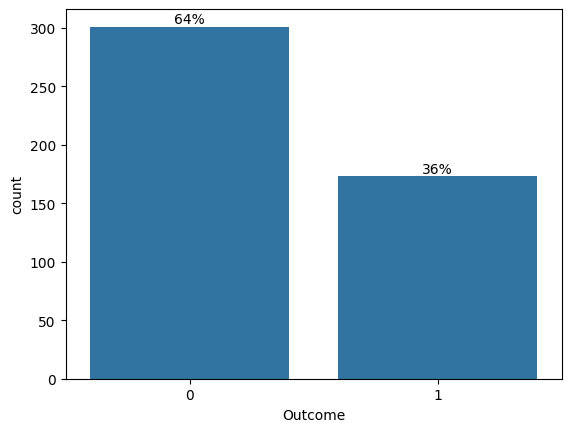

In [6]:
# Plotting Outcome

import seaborn as sns

total=float(len(df))
ax = sns.countplot(x="Outcome", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

In [7]:
# Adjusting data to make a correaltional graph

# Converting Male: 0 and Female: 1
df.loc[df['Sex'] == 'Male', 'Sex'] = 0
df.loc[df['Sex'] == 'Female', 'Sex'] = 1
df['Sex'] = df['Sex'].astype('int64')

# Converting In a relationship: 0, Single: 1, Married: 2 and Divorced: 3
df.loc[df['Relationship Status'] == 'In a relationship', 'Relationship Status'] = 0
df.loc[df['Relationship Status'] == 'Single', 'Relationship Status'] = 1
df.loc[df['Relationship Status'] == 'Married', 'Relationship Status'] = 2
df.loc[df['Relationship Status'] == 'Divorced', 'Relationship Status'] = 3
df['Relationship Status'] = df['Relationship Status'].astype('int64')

# Converting University Student: 0, School Student: 1, Salaried Worker: 2 and Retired: 3
df.loc[df['Occupation'] == 'University Student', 'Occupation'] = 0
df.loc[df['Occupation'] == 'School Student', 'Occupation'] = 1
df.loc[df['Occupation'] == 'Salaried Worker', 'Occupation'] = 2
df.loc[df['Occupation'] == 'Retired', 'Occupation'] = 3
df['Occupation'] = df['Occupation'].astype('int64')

# Dropping Affiliations and PLatforms Used
df.drop('Affiliations', axis=1, inplace=True)
df.drop('Platforms Used', axis=1, inplace=True)
df.drop('Social Media User?', axis=1, inplace=True)

df.head()

,Age,Sex,Relationship Status,Occupation,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,0,0,2,15,0,0,13,28,1
1,21,1,1,0,5,9,5,3,13,30,1
2,21,1,1,0,3,3,4,-1,8,14,0
3,21,1,1,0,5,3,4,4,3,14,0
4,21,1,1,0,2,13,8,0,5,26,1


In [8]:
df.corr()

,Age,Sex,Relationship Status,Occupation,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
Age,1.000000,-0.153368,0.565100,0.647991,-0.381132,-0.282734,-0.269563,-0.105863,-0.288442,-0.320867,-0.203037
Sex,-0.153368,1.000000,-0.104617,-0.139999,0.206786,0.083641,0.132732,0.069995,0.104111,0.122859,0.088270
Relationship Status,0.565100,-0.104617,1.000000,0.512446,-0.317566,-0.204752,-0.201112,-0.118097,-0.227664,-0.250066,-0.161013
Occupation,0.647991,-0.139999,0.512446,1.000000,-0.300866,-0.259821,-0.259740,-0.107869,-0.269258,-0.301600,-0.184888
Time Spent,-0.381132,0.206786,-0.317566,-0.300866,1.000000,0.422832,0.393670,0.175700,0.308469,0.438052,0.385565
ADHD Score,-0.282734,0.083641,-0.204752,-0.259821,0.422832,1.000000,0.592228,0.262406,0.563269,0.862919,0.711179
Anxiety Score,-0.269563,0.132732,-0.201112,-0.259740,0.393670,0.592228,1.000000,0.345650,0.544057,0.780221,0.632456
Self Esteem Score,-0.105863,0.069995,-0.118097,-0.107869,0.175700,0.262406,0.345650,1.000000,0.321424,0.549249,0.417867
Depression Score,-0.288442,0.104111,-0.227664,-0.269258,0.308469,0.563269,0.544057,0.321424,1.000000,0.817798,0.681650
Total Score,-0.320867,0.122859,-0.250066,-0.301600,0.438052,0.862919,0.780221,0.549249,0.817798,1.000000,0.816319


In [9]:
# By the Correlation Graph, we can drop Age, Sex, Relationship Status, Occupation. 
# Age and Sex have a low negative correational
# This shows that irrespective of what age, sex, relationship status and occupation a person has, 
# social media has the same affect of mental illness.
# Also, can remove total score as outcome is determined by it hence the positive correlational is given.

df.drop('Age', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Relationship Status', axis=1, inplace=True)
df.drop('Occupation', axis=1, inplace=True)
df.drop('Total Score', axis=1, inplace=True)

df.head()

,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Outcome
0,2,15,0,0,13,1
1,5,9,5,3,13,1
2,3,3,4,-1,8,0
3,5,3,4,4,3,0
4,2,13,8,0,5,1


In [10]:
df.corr()

,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Outcome
Time Spent,1.000000,0.422832,0.393670,0.175700,0.308469,0.385565
ADHD Score,0.422832,1.000000,0.592228,0.262406,0.563269,0.711179
Anxiety Score,0.393670,0.592228,1.000000,0.345650,0.544057,0.632456
Self Esteem Score,0.175700,0.262406,0.345650,1.000000,0.321424,0.417867
Depression Score,0.308469,0.563269,0.544057,0.321424,1.000000,0.681650
Outcome,0.385565,0.711179,0.632456,0.417867,0.681650,1.000000


<Axes: >

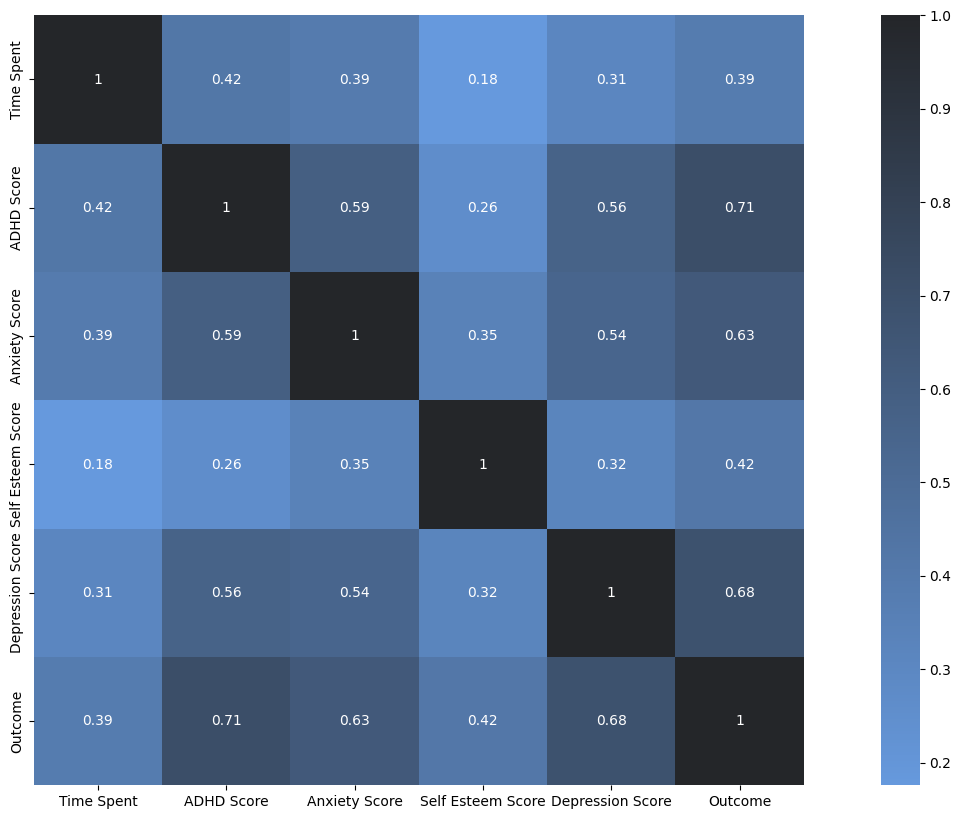

In [11]:
# Correlational Graph

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)

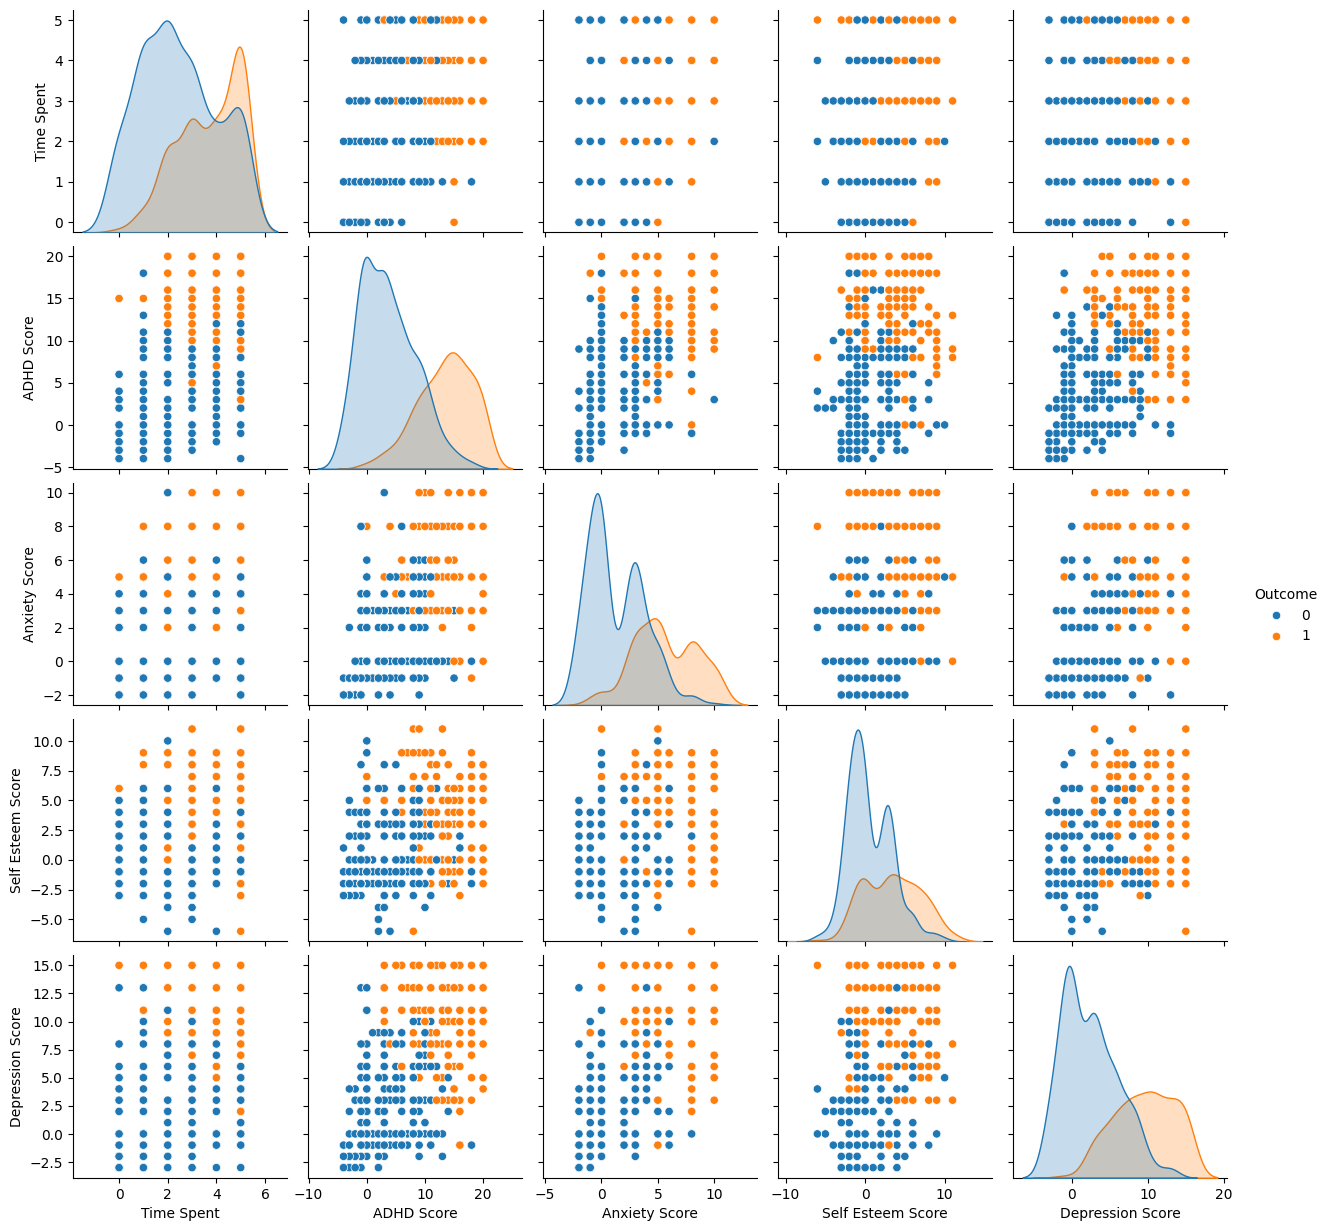

In [12]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')

In [13]:
# Time spent shows a moderate positive correlational to outcome. 
# Showing that Social Media does have an effect on mental illness.

In [14]:
df.head()

,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Outcome
0,2,15,0,0,13,1
1,5,9,5,3,13,1
2,3,3,4,-1,8,0
3,5,3,4,4,3,0
4,2,13,8,0,5,1


In [25]:
# Imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [26]:
# X, Y and data split

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 ,random_state=16)

In [27]:
# Models

modelLR = LogisticRegression(random_state=16, solver='lbfgs', multi_class='multinomial')
modelDTC = DecisionTreeClassifier(random_state=16)
modelRFC = RandomForestClassifier(n_estimators=1024, max_depth=16, random_state=16)
modelSVC = SVC(random_state=16)
modelKNN = KNeighborsClassifier()
modelGNB = GaussianNB()
modelNNets = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5120, 16), random_state=16)
modelSDG = SGDClassifier(max_iter=5120, random_state=16)

In [28]:
# Model Fitting

modelLR.fit(X_train, y_train)
modelDTC.fit(X_train, y_train)
modelRFC.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)
modelKNN.fit(X_train, y_train)
modelGNB.fit(X_train, y_train)
modelNNets.fit(X_train, y_train)
modelSDG.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


SGDClassifier(max_iter=5120, random_state=16)

In [29]:
# Predicts

y_predLR = modelLR.predict(X_test)
y_predDTC = modelDTC.predict(X_test)
y_predRFC = modelRFC.predict(X_test)
y_predSVC = modelSVC.predict(X_test)
y_predKNN = modelKNN.predict(X_test)
y_predGNB = modelGNB.predict(X_test)
y_predNNets = modelNNets.predict(X_test)
y_predSDG = modelSDG.predict(X_test)

In [31]:
# Accuracies

aLR = accuracy_score(y_test, y_predLR)
aDTC = accuracy_score(y_test, y_predDTC)
aRFC = accuracy_score(y_test, y_predRFC)
aSVC = accuracy_score(y_test, y_predSVC)
aKNN = accuracy_score(y_test, y_predKNN)
aGNB = accuracy_score(y_test, y_predGNB)
aNNets = accuracy_score(y_test, y_predNNets)
aSDG = accuracy_score(y_test, y_predSDG)

In [32]:
# By seeing the accuracies of the models, LR has the best accuracy of 100% yet to good to be true.
# By that chosing Neural Nets would be the best way to go with out of these 8 models.
# So we would compare Neural Nets with FNN.

a = [aLR, aDTC, aRFC, aSVC, aKNN, aGNB, aNNets, aSDG]
for _ in a:
    print(_)

1.0
0.8842105263157894
0.9473684210526315
0.9789473684210527
0.968421052631579
0.9578947368421052
0.9894736842105263
0.968421052631579


In [33]:
# Imports

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
# Model and model fitting
# Using FNN

modelNN = Sequential()
modelNN.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
modelNN.add(Dense(32, activation='relu'))  
modelNN.add(Dense(16, activation='relu')) 
modelNN.add(Dense(8, activation='relu')) 
modelNN.add(Dense(1, activation='sigmoid'))
modelNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelNN.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
y_pred_prob_NN = modelNN.predict(X_test)
y_predNN = (y_pred_prob_NN > 0.5).astype(int) 
aNN = accuracy_score(y_test, y_predNN)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5359 - loss: 0.6680
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.4583
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8773 - loss: 0.3565
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8841 - loss: 0.3117
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8717 - loss: 0.2797
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8769 - loss: 0.2950
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9215 - loss: 0.2122
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9126 - loss: 0.2057
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9411 - loss: 0.1638
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9120 - loss: 0.1795
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9203 - loss: 0.1769
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step -

In [35]:
print(aNN)

0.9789473684210527
